Voici quelques fonctions utiles qui vous permettront de répondre aux questions du TD (Séries de Fourier, feuille no2)

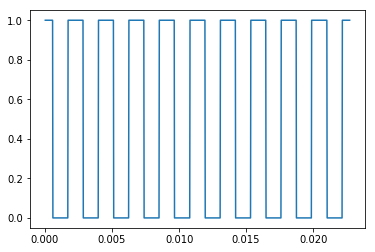

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io


class signal_mono: 
    pass

## on conviendra que les champs d'un signal_mono sont : 
##  signal.x  : les valeurs du signal 
##  signal.N= : le nombre d'échantillons 
##  signal.Fs : la frequence d'echantillonnage en Hz
##  signal.t : le vecteur des temps associé




def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 


def creer_signal(valeurs,Fs):
    out = signal_mono()
    out.x = normaliser_son_mono(valeurs)
    out.N= np.size(out.x)
    out.Fs=Fs
    out.t=np.arange(out.N)/Fs
    return out

def extraire(signal,t_min,t_max):
    condition = ( signal.t   < t_max )*( signal.t > t_min)
    out= signal_mono
    out.x = np.extract(condition,signal.x)
    out.t=np.extract(condition,signal.t)
    out.N= signal.N
    out.Fs=signal.Fs
    return out

def enregistrer_son(nom_fichier,signal,Fs):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav

    
def rectangle(t):
    condition = ( ((t%1) <= 0.25) | ((t%1) >= 0.75))
    x = 1*condition
    return x

def fourier_rect(N):   ### les coefficients a0,a1,...aN calculés en cours
    a = np.zeros(N)
    a[0]=1
    indices=np.arange(1,N,2)
    a[indices]=((2/(np.pi))/indices)*((-1)**(np.round((indices-1)/2)))
    return a


Fs=44100
Ts=1/Fs

f0=440
t=np.arange(0,3,Ts)    ## un vecteur des temps entre 0 et 3 secondes avec un pas de Ts
x=creer_signal(rectangle(t*f0),Fs)

xx = extraire(x,0,10/440)
    
plt.plot(xx.t,xx.x)
plt.show()

enregistrer_son("son_rectangle.wav",x,Fs)
